In [1]:
#importing libraries
import numpy as np
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df.head()

/opt/anaconda3/envs/p_da_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [2]:
df_DA=df[df['job_title']=='Data Analyst'].copy()

In [7]:
df_DA['job_posted_month_no']=df_DA['job_posted_date'].dt.month

In [9]:
df_DA_exploded=df_DA.explode('job_skills')

In [10]:
df_DA_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785644,Data Analyst,Data Analyst,"Las Condes, Chile","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Chile,2023-08-20 06:29:50,True,False,Chile,None,NaN,NaN,Worldgroup Careers MWT,r,"{'analyst_tools': ['power bi'], 'cloud': ['sno...",8
785644,Data Analyst,Data Analyst,"Las Condes, Chile","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Chile,2023-08-20 06:29:50,True,False,Chile,None,NaN,NaN,Worldgroup Careers MWT,snowflake,"{'analyst_tools': ['power bi'], 'cloud': ['sno...",8
785644,Data Analyst,Data Analyst,"Las Condes, Chile","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Chile,2023-08-20 06:29:50,True,False,Chile,None,NaN,NaN,Worldgroup Careers MWT,power bi,"{'analyst_tools': ['power bi'], 'cloud': ['sno...",8
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc",sql,"{'analyst_tools': ['excel'], 'programming': ['...",7


In [14]:
df_DA_pivot=df_DA_exploded.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)


In [15]:
df_DA_pivot.loc["total"]= df_DA_pivot.sum()

In [27]:
df_DA_pivot_final=df_DA_pivot.sort_values(by='total',axis=1,ascending=False).iloc[:-1,:5]#.drop('total',axis=1)

In [33]:
df_reseted=df_DA_pivot_final.reset_index()
#df_DA_pivot_final['month_name']=df_DA_pivot_final['job_posted_month_no'].apply(lambda x: calendar.month_abbr[x])

In [30]:
import calendar

In [34]:
df_reseted['month_name']=df_reseted['job_posted_month_no'].apply(lambda x: calendar.month_abbr[x])

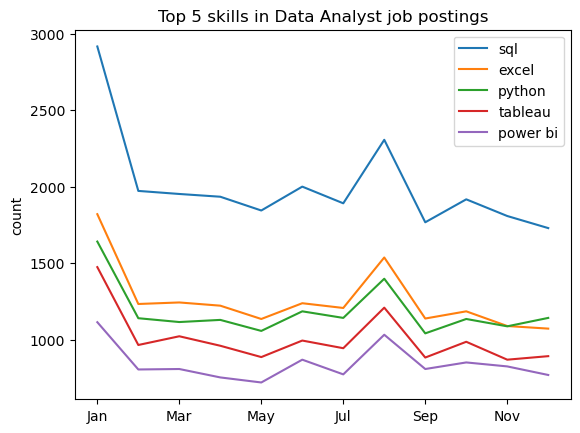

In [39]:
df_reseted.drop('job_posted_month_no',axis=1).plot(x='month_name',kind='line')
plt.xlabel('')
plt.ylabel('count')
plt.title('Top 5 skills in Data Analyst job postings')
plt.legend(title='')
plt.show()